In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_excel(r'd:\00 - Woxsen\MBA (Business Analytics)\Term 3 - Subjects\Machine Learning for Business\10Mar25\air cargo supplychain.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Shipment ID                     7148 non-null   int64  
 1   Origin Airport                  7148 non-null   int64  
 2   Destination Airport             7148 non-null   int64  
 3   Shipment Weight (kg)            7148 non-null   float64
 4   Shipment Volume (m³)            7148 non-null   float64
 5   Freight Cost (USD)              7148 non-null   float64
 6   Mode of Transport               7148 non-null   int64  
 7   Carrier Name                    7148 non-null   int64  
 8   Transit Time (hours)            7148 non-null   int64  
 9   Temperature-Sensitive           7148 non-null   int64  
 10  Perishable Goods                7148 non-null   int64  
 11  Customs Clearance Time (hours)  7148 non-null   int64  
 12  Weather Conditions              71

In [4]:
df.describe()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Delay Status,Total Processing Time (hours),Is Weekend
count,7148.0,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000
mean,0.0,2.970341,3.034135,511.920365,25.645038,971.852105,0.467823,1.965305,37.855204,0.286654,0.189284,24.524762,0.794208,0.500000,62.379966,0.299105
std,0.0,1.981152,1.991295,268.380153,13.496999,503.155953,0.748077,1.400663,18.379171,0.452230,0.391761,12.412248,1.075327,0.500035,21.886730,0.457898
min,0.0,0.000000,0.000000,0.171800,0.006131,0.092911,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000
25%,0.0,1.000000,1.000000,312.574820,15.431774,598.082536,0.000000,1.000000,24.000000,0.000000,0.000000,15.000000,0.000000,0.000000,47.000000,0.000000
50%,0.0,3.000000,3.000000,502.562132,25.248184,953.394793,0.000000,2.000000,37.000000,0.000000,0.000000,24.000000,0.000000,0.500000,62.000000,0.000000
75%,0.0,5.000000,5.000000,693.998121,34.862601,1322.713754,1.000000,3.000000,50.000000,1.000000,0.000000,33.000000,2.000000,1.000000,77.000000,1.000000
max,0.0,6.000000,6.000000,1515.479371,89.708889,3088.261761,2.000000,4.000000,106.000000,1.000000,1.000000,72.000000,3.000000,1.000000,145.000000,1.000000


In [5]:
df.head()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Delay Status,Total Processing Time (hours),Is Weekend
0,0,1,2,510.579070,25.843105,602.562258,1,3,6,0,0,27,3,0,33,0
1,0,0,3,546.960305,36.212444,1296.841104,0,2,14,0,0,15,2,0,29,0
2,0,4,0,3.810170,22.658416,1566.738113,0,2,22,0,0,26,0,0,48,1
3,0,1,4,307.113723,14.976834,534.852119,2,0,27,0,1,18,0,0,45,0
4,0,0,5,641.313287,20.081321,116.461287,2,1,23,0,0,46,0,0,69,0


In [6]:
df.shape

(7148, 16)

In [7]:
df.isnull().sum()

Shipment ID                       0
Origin Airport                    0
Destination Airport               0
Shipment Weight (kg)              0
Shipment Volume (m³)              0
Freight Cost (USD)                0
Mode of Transport                 0
Carrier Name                      0
Transit Time (hours)              0
Temperature-Sensitive             0
Perishable Goods                  0
Customs Clearance Time (hours)    0
Weather Conditions                0
Delay Status                      0
Total Processing Time (hours)     0
Is Weekend                        0
dtype: int64

In [8]:
df['Delay Status'] = df['Delay Status'].map({'Delayed': 1, 'On-Time': 0})

In [9]:
categorical_features = ['Origin Airport', 'Destination Airport', 'Mode of Transport', 'Carrier Name',
                        'Temperature-Sensitive', 'Perishable Goods', 'Weather Conditions', 'Day of Week']
numeric_features = ['Shipment Weight (kg)', 'Shipment Volume (m³)', 'Freight Cost (USD)',
                     'Transit Time (hours)', 'Customs Clearance Time (hours)']

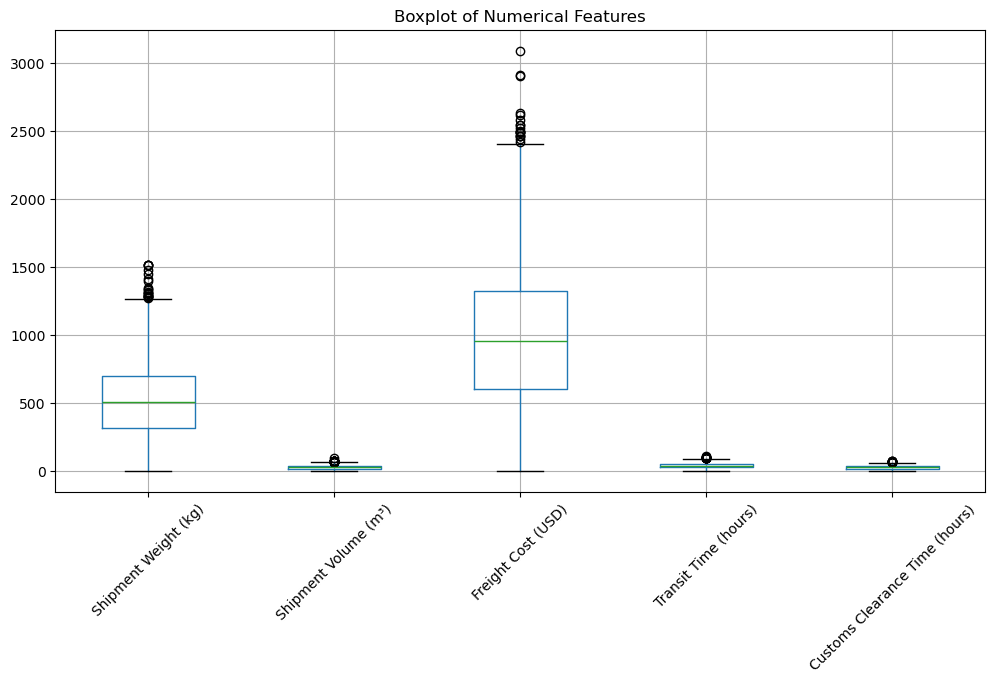

In [10]:
plt.figure(figsize=(12, 6))
df[numeric_features].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

In [11]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in numeric_features:
    df = remove_outliers(df, col)

In [12]:
X_categorical = pd.get_dummies(df[categorical_features])
X_numeric = df[numeric_features]

KeyError: "['Day of Week'] not in index"

In [120]:
X_categorical=X_categorical.astype(int)

In [121]:
X_categorical

,Origin Airport_ATL,Origin Airport_DFW,Origin Airport_JFK,Origin Airport_LAX,Origin Airport_MIA,Origin Airport_ORD,Origin Airport_SFO,Destination Airport_CDG,Destination Airport_DXB,Destination Airport_HKG,...,Weather Conditions_Foggy,Weather Conditions_Rainy,Weather Conditions_Stormy,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
19996,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
19997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19998,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [122]:
X = pd.concat([X_numeric, X_categorical], axis=1)
y = df['Delay Status']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)


In [124]:
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [125]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [126]:
y_pred = model.predict(X_test)


In [127]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [128]:
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

Accuracy: 0.4945
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51      2016
           1       0.49      0.46      0.47      1984

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
decision_tree_model = DecisionTreeClassifier(random_state=59)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=59)

In [131]:
y_pred_tree = decision_tree_model.predict(X_test)

In [132]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

In [133]:
print(f'Decision Tree Accuracy: {accuracy_tree:.4f}')
print('Decision Tree Classification Report:\n', report_tree)

Decision Tree Accuracy: 0.5050
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.51      2016
           1       0.50      0.49      0.50      1984

    accuracy                           0.51      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.51      0.50      4000

